In [4]:
import pandas as pd
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

import seaborn as sns
sns.set_style('whitegrid')
import os
from scipy import sparse
from scipy.sparse import csr_matrix

from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import random

In [20]:
if not os.path.isfile('data.csv'):
    # Create a file 'data.csv' before reading it
    # Read all the files in netflix and store them in one big file('data.csv')
    # reading from each of the four files and appending each rating to a global file 'train.csv'
    data = open('data.csv', mode='w')
    
    row = list()
    files=['/Users/sarahhan/Downloads/data_folder/combined_data_1.txt','/Users/sarahhan/Downloads/data_folder/combined_data_2.txt', 
           '/Users/sarahhan/Downloads/data_folder/combined_data_3.txt', '/Users/sarahhan/Downloads/data_folder/combined_data_4.txt']
    for file in files:
        print("Reading ratings from {}...".format(file))
        with open(file) as f:
            for line in f: 
                del row[:]
                line = line.strip()
                if line.endswith(':'):
                    # All below are ratings for this movie, until another movie appears.
                    movie_id = line.replace(':', '')
                else:
                    row = [x for x in line.split(',')]
                    row.insert(0, movie_id)
                    data.write(','.join(row))
                    data.write('\n')
        print("Done.\n")
    data.close()

Reading ratings from /Users/sarahhan/Downloads/data_folder/combined_data_1.txt...
Done.

Reading ratings from /Users/sarahhan/Downloads/data_folder/combined_data_2.txt...
Done.

Reading ratings from /Users/sarahhan/Downloads/data_folder/combined_data_3.txt...
Done.

Reading ratings from /Users/sarahhan/Downloads/data_folder/combined_data_4.txt...
Done.



In [5]:
print("creating the dataframe from data.csv file..")
df = pd.read_csv('data.csv', sep=',', 
                       names=['movie', 'user','rating','date'])
df.date = pd.to_datetime(df.date)
print('Done.\n')

# arranging the ratings according to time.
print('Sorting the dataframe by date..')
df.sort_values(by='date', inplace=True)
print('Done..')

creating the dataframe from data.csv file..
Done.

Sorting the dataframe by date..
Done..


In [22]:
print(df['rating'].describe())

count    1.004805e+08
mean     3.604290e+00
std      1.085219e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


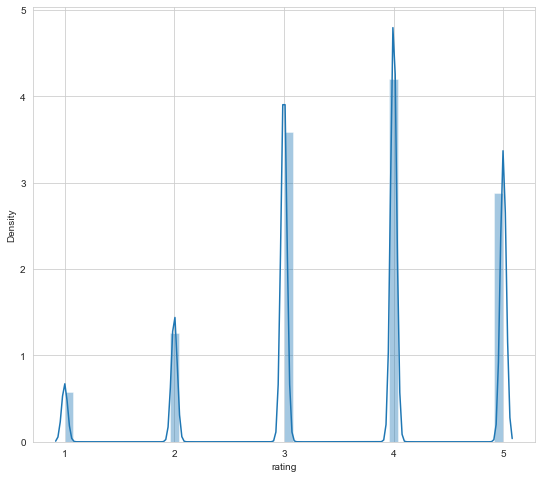

In [23]:
plt.figure(figsize=(9, 8))
sns.distplot(df['rating']);

In [6]:
df_num = df.select_dtypes(include = 'number')
df_num.head()

,movie,user,rating
56431994,10341,510180,4
9056171,1798,510180,5
58698779,10774,510180,3
48101611,8651,510180,2
81893208,14660,510180,2


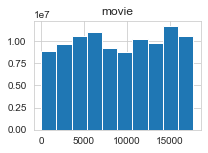

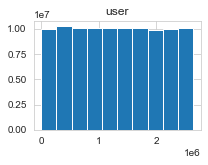

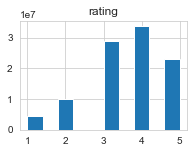

In [8]:
for feature in df_num.columns:
    plt.figure(figsize=(3, 2))
    plt.title(feature)
    df_num[feature].hist().plot()

In [9]:
print('number of NaN values in our dataset:', sum(df.isnull().any()))
dup = df.duplicated(['movie','user','rating'])
dups = sum(dup) #considering by column
print('there are {} duplicate rating entries in the data.....'.format(dups))

number of NaN values in our dataset: 0
there are 0 duplicate rating entries in the data.....
